In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import minerl
import utilities
import h5py
from tqdm import tqdm

/home/marthinwurer/.pyenv/versions/3.9.6/envs/minerl/lib/python3.9/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [4]:
from minerl.data import BufferedBatchIter

In [4]:
data = minerl.data.make(
    'MineRLObtainDiamondVectorObf-v0', "data")
bbi = BufferedBatchIter(data)
iterator = bbi.buffered_batch_iter(batch_size=32, num_epochs=1)


Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessin

In [16]:
current_state, action, reward, next_state, done = next(iterator)

100%|████████████████████████████████████████████████| 46648/46648 [00:00<00:00, 63832.86it/s]


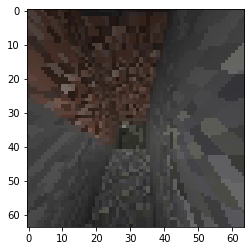

In [17]:
plt.imshow(np.reshape(current_state["pov"][0], (64, 64, 3)))

In [18]:
current_state["pov"].shape

(32, 64, 64, 3)

In [19]:
def convert_pov(state):
    return np.transpose(state['pov'], (0, 3, 1, 2))

In [20]:
convert_pov(current_state).shape

(32, 3, 64, 64)

In [21]:
trajectories = data.get_trajectory_names()
trajectories

['v3_sticky_chick_pea_gnome-18_17559-31315',
 'v3_svelte_cherry_devil-17_314-11959',
 'v3_aggravating_artichoke_harpy-11_186-12079',
 'v3_agonizing_kale_tree_nymph-4_41105-57631',
 'v3_excellent_mango_beast-6_30058-43288',
 'v3_juvenile_apple_angel-7_158092-167444',
 'v3_equal_olive_chimera-7_10379-19453',
 'v3_earnest_water_chestnut_gargoyle-6_255-25556',
 'v3_subtle_iceberg_lettuce_nymph-4_32796-57962',
 'v3_late_basil_lake_spirit-7_1236-19762',
 'v3_subtle_iceberg_lettuce_nymph-4_20999-27579',
 'v3_cute_breadfruit_spirit-1_35476-37415',
 'v3_juicy_jackfruit_griffin-1_1316-43029',
 'v3_long_term_okra_dwarf-1_16451-43284',
 'v3_equal_olive_chimera-9_14563-24740',
 'v3_other_pomegranite_orc-12_351-13496',
 'v3_juvenile_apple_angel-7_48978-62020',
 'v3_agonizing_kale_tree_nymph-20_7989-16044',
 'v3_ample_salad_doppelganger-1_556-12734',
 'v3_excellent_mango_beast-6_49144-52389',
 'v3_juvenile_apple_angel-6_221-11831',
 'v3_alarming_arugula_medusa-12_32515-56508',
 'v3_cheery_acorn_squas

In [23]:
loaded = list(data.load_data(trajectories[0]))
loaded[0]

100%|████████████████████████████████████████████████| 13702/13702 [00:00<00:00, 27333.12it/s]


[OrderedDict([('pov',
               array([[[166, 194, 246],
                       [164, 192, 244],
                       [164, 192, 244],
                       ...,
                       [146, 179, 250],
                       [147, 179, 248],
                       [147, 179, 248]],
               
                      [[164, 192, 244],
                       [164, 192, 244],
                       [164, 192, 244],
                       ...,
                       [146, 179, 250],
                       [147, 179, 248],
                       [147, 179, 248]],
               
                      [[166, 194, 246],
                       [164, 192, 244],
                       [162, 192, 246],
                       ...,
                       [147, 179, 248],
                       [147, 179, 248],
                       [148, 180, 249]],
               
                      ...,
               
                      [[ 63,  42,  29],
                       [ 63,  42,  29],


In [24]:
loaded[-1]

[OrderedDict([('pov',
               array([[[60, 60, 60],
                       [60, 60, 60],
                       [60, 60, 60],
                       ...,
                       [46, 46, 46],
                       [47, 47, 47],
                       [47, 47, 47]],
               
                      [[60, 60, 60],
                       [60, 60, 60],
                       [60, 60, 60],
                       ...,
                       [46, 46, 46],
                       [47, 47, 47],
                       [47, 47, 47]],
               
                      [[55, 55, 55],
                       [60, 60, 60],
                       [60, 60, 60],
                       ...,
                       [46, 46, 46],
                       [47, 47, 47],
                       [47, 47, 47]],
               
                      ...,
               
                      [[67, 67, 67],
                       [67, 67, 67],
                       [67, 67, 67],
                       

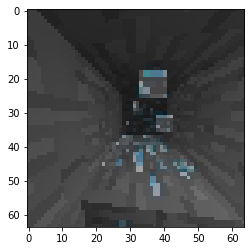

In [25]:
plt.imshow(np.reshape(loaded[-1][0]['pov'], (64, 64, 3)))

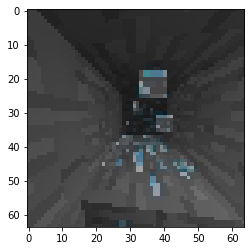

In [26]:
plt.imshow(np.reshape(loaded[-1][3]['pov'], (64, 64, 3)))

In [29]:
loaded[-1][0]['pov'] - loaded[-1][3]['pov']

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [30]:
import h5py

In [49]:
f = h5py.File("test_data.hdf5", 'w')

In [50]:
f

<HDF5 file "test_data.hdf5" (mode r+)>

In [51]:
f.create_dataset('pov', (0, 64, 64, 3), maxshape=(None, 64, 64, 3), dtype='uint8')

<HDF5 dataset "pov": shape (0, 64, 64, 3), type "|u1">

In [56]:
f.close()

In [43]:
frame = loaded[-1][3]['pov']

In [44]:
frame.dtype

dtype('uint8')

In [10]:
def hdf5_append(f, name, data):
    dset = f[name]
    dset.resize(dset.shape[0]+data.shape[0], axis = 0)
    dset[-data.shape[0]:] = data
    

In [54]:
hdf5_append(f, 'pov', frame)

In [55]:
f['pov'][0]

array([[[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [46, 46, 46],
        [47, 47, 47],
        [47, 47, 47]],

       [[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [46, 46, 46],
        [47, 47, 47],
        [47, 47, 47]],

       [[55, 55, 55],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [46, 46, 46],
        [47, 47, 47],
        [47, 47, 47]],

       ...,

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [74, 74, 74]],

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [91, 91, 91]],

       [[67, 67, 67],
        [67, 67, 67],
        [83, 83, 83],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [74, 74, 74]]], dtype=uint8)

In [59]:
reward_frames = [idx for idx, x in enumerate(loaded) if x[2] != 0]

In [60]:
reward_frames

[292, 611, 649, 857, 1064, 2359, 3179, 5649, 5808, 7197, 8043, 13701]

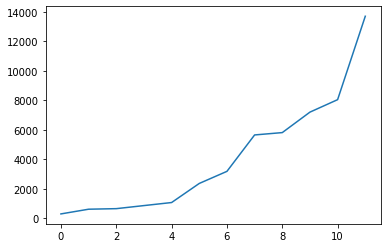

In [61]:
plt.plot(reward_frames)

In [64]:
current_state['vector'].shape

(32, 64)

In [63]:
action['vector'].shape

(32, 64)

In [67]:
reward.shape

(32,)

In [101]:
f.close()

In [102]:
f = h5py.File("test_data.hdf5", 'w')
f.create_dataset('pov', (0, 64, 64, 3), maxshape=(None, 64, 64, 3), dtype='uint8')
f.create_dataset('vector', (0, 64), maxshape=(None, 64), dtype='f')
f.create_dataset('action', (0, 64), maxshape=(None, 64), dtype='f')
f.create_dataset('reward', (0, 1), maxshape=(None, 1), dtype='f', chunks=True)
f.create_dataset('done', (0, 1), maxshape=(None, 1), dtype='?', chunks=True)


<HDF5 dataset "done": shape (0, 1), type "|b1">

In [103]:
pov = []
vec = []
act = []
rew = []
dones = []

In [104]:
for current_state, action, reward, next_state, done in loaded:
    pov.append(current_state['pov'])
    vec.append(current_state['vector'])
    act.append(action['vector'])
    rew.append([reward])
    dones.append([done])

In [105]:
dones[-1]

[True]

In [106]:
hdf5_append(f, 'pov', np.asarray(pov))

In [107]:
hdf5_append(f, 'vector', np.asarray(vec))

In [108]:
hdf5_append(f, 'action', np.asarray(act))

In [109]:
hdf5_append(f, 'reward', np.asarray(rew))

In [111]:
hdf5_append(f, 'done', np.asarray(dones))

In [113]:
survival_data = minerl.data.make('MineRLObtainDiamondSurvivalVectorObf-v0', "data")

Process ForkPoolWorker-14:
Process ForkPoolWorker-16:
Process ForkPoolWorker-15:
Process ForkPoolWorker-13:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiproce

In [118]:
s_loaded = list(survival_data.load_data(survival_data.get_trajectory_names()[-1]))

100%|█████████████████████████████████████████████████| 6546/6546 [00:00<00:00, 128764.38it/s]


In [117]:
survival_data.get_trajectory_names()

['v3_burdensome_durian_polyphemus-11_28177-30948',
 'v3_bossy_lingonberry_behemoth-6_129-2242',
 'v3_complex_peach_undead-9_156-4284',
 'v3_other_pomegranite_orc-3_97-14804',
 'v3_incredible_melon_leviathan-6_88-9734',
 'v3_complex_peach_undead-7_138-44398',
 'v3_hoarse_watermelon_gargoyle-24_2093-4890',
 'v3_absolute_grape_changeling-7_46-815',
 'v3_excellent_pluot_behemoth-13_77-27923',
 'v3_rectangular_ugli_fruit_unicorn-9_370-106325',
 'v3_immaculate_blueberry_doppelganger-1_129-8075',
 'v3_wasteful_rocket_polyphemus-8_81798-85034',
 'v3_inferior_parsnip_banshee-7_111-14269',
 'v3_late_basil_lake_spirit-10_30201-30990',
 'v3_agonizing_kale_tree_nymph-4_30716-32459',
 'v3_cool_sweet_potato_nymph-14_56975-83373',
 'v3_accomplished_pickle_vampire-2_122026-163359',
 'v3_colorless_mung_bean_dragon-16_57636-62373',
 'v3_magnificent_elderberry_nessie-2_80206-128366',
 'v3_brisk_cucumber_ogre-3_560-25964',
 'v3_total_loquat_nessie-2_3925-35498',
 'v3_absolute_grape_changeling-39_19897-2373

In [31]:
def dump_minerl_dataset(names, outfile):
    if not isinstance(names, list):
        names = [names]
    
    initial_size = 12500504
    
    dset_names = ['pov', 'vector', 'action', 'reward', 'done']
    
    f = h5py.File(outfile, 'w')
    pov = f.create_dataset('pov', (initial_size, 64, 64, 3), maxshape=(initial_size, 64, 64, 3), dtype='uint8')
    vec = f.create_dataset('vector', (initial_size, 64), maxshape=(initial_size, 64), dtype='f')
    act = f.create_dataset('action', (initial_size, 64), maxshape=(initial_size, 64), dtype='f')
    rew = f.create_dataset('reward', (initial_size, 1), maxshape=(initial_size, 1), dtype='f')
    don = f.create_dataset('done', (initial_size, 1), maxshape=(initial_size, 1), dtype='?')
    written = 0
    
    for name in names:
        minerl_dset = minerl.data.make(name, "data")

        for trajectory in tqdm(minerl_dset.get_trajectory_names()):
            traj_data = list(minerl_dset.load_data(trajectory))

            for i, data in enumerate(traj_data):
                current_state, action, reward, next_state, done = data
                idx = written + i
                pov[idx] = current_state['pov']
                vec[idx] = current_state['vector']
                act[idx] = action['vector']
                rew[idx, 0] = reward
                don[idx, 0] = done
            
            size = len(traj_data)
            written += size

    f.close()

In [32]:
target_datasets = ["MineRLObtainDiamondSurvivalVectorObf-v0", "MineRLObtainDiamondVectorObf-v0"]

In [33]:
dump_minerl_dataset(target_datasets, "obtain_diamond.hdf5")

100%|████████████████████████████████████████████████| 51429/51429 [00:00<00:00, 81220.27it/s]
Process ForkPoolWorker-36:
Process ForkPoolWorker-34:
Process ForkPoolWorker-33:
Process ForkPoolWorker-35:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/marthinwurer/.pyenv/versions/3.9.6/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **sel

KeyboardInterrupt: 

In [24]:
f.close()

NameError: name 'f' is not defined

In [9]:
def get_minerl_size(names):
    if not isinstance(names, list):
        names = [names]
    
    total = 0
    for name in names:
        minerl_dset = minerl.data.make(name, "data")

        for trajectory in tqdm(minerl_dset.get_trajectory_names()):
            data = minerl_dset.load_data(trajectory)
            total += len(list(data))
    return total


In [10]:
total = get_minerl_size(target_datasets)

100%|████████████████████████████████████████████████████| 307/307 [00:00<00:00, 94701.13it/s]

100%|███████████████████████████████████████████████████| 307/307 [00:00<00:00, 102202.66it/s]

100%|██████████████████████████████████████████████████| 6690/6690 [00:00<00:00, 55114.28it/s]


100%|████████████████████████████████████████████████████| 116/116 [00:00<00:00, 91489.14it/s]

100%|███████████████████████████████████████████████████| 812/812 [00:00<00:00, 123254.74it/s]

100%|████████████████████████████████████████████████████| 281/281 [00:00<00:00, 97825.32it/s]

100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 94381.28it/s]

100%|███████████████████████████████████████████████████| 776/776 [00:00<00:00, 138897.28it/s]

 14%|███████▋                                               | 135/968 [03:49<10:50,  1.28it/s]


100%|███████████████████████████████████████████████████| 825/825 [00:00<00:00, 111120.77it/s]


100%|███████████████████████████████████████████████████| 361/361 [00:00<00:00, 125644.66it/s]

100%|████████████████████████████████████████████████████| 128/128 [00:00<00:00, 84387.13it/s]

100%|██████████████████████████████████████████████████████| 78/78 [00:00<00:00, 61879.27it/s]

100%|████████████████████████████████████████████████████| 416/416 [00:00<00:00, 94315.16it/s]

100%|████████████████████████████████████████████████████| 196/196 [00:00<00:00, 93386.75it/s]

 27%|███████████████                                        | 265/968 [07:42<25:56,  2.21s/it]


100%|█████████████████████████████████████████████████████| 42/42 [00:00<00:00, 121742.06it/s]

100%|███████████████████████████████████████████████████| 626/626 [00:00<00:00, 128248.63it/s]

100%|███████████████████████████████████████████████████| 293/293 [00:00<00:00, 135136.47it/s]

 10%|████▊                                            | 5201/53435 [00:00<00:00, 52007.57it/s]


100%|███████████████████████████████████████████████████| 555/555 [00:00<00:00, 126616.19it/s]

100%|████████████████████████████████████████████████████| 291/291 [00:00<00:00, 95183.85it/s]

100%|████████████████████████████████████████████████████| 272/272 [00:00<00:00, 94810.16it/s]

100%|████████████████████████████████████████████████████| 331/331 [00:00<00:00, 95567.88it/s]

100%|███████████████████████████████████████████████████| 351/351 [00:00<00:00, 127606.89it/s]

100%|████████████████████████████████████████████████| 12963/12963 [00:00<00:00, 77055.52it/s]


100%|███████████████████████████████████████████████████| 785/785 [00:00<00:00, 126116.70it/s]

100%|███████████████████████████████████████████████████| 278/278 [00:00<00:00, 102823.33it/s]

100%|███████████████████████████████████████████████████| 364/364 [00:00<00:00, 136096.15it/s]

 37%|█████████████████▍                             | 13130/35509 [00:00<00:00, 131294.80it/s]


100%|████████████████████████████████████████████████████| 368/368 [00:00<00:00, 72149.95it/s]

100%|███████████████████████████████████████████████████| 734/734 [00:00<00:00, 125719.50it/s]

100%|███████████████████████████████████████████████████| 270/270 [00:00<00:00, 102894.97it/s]

100%|███████████████████████████████████████████████████| 348/348 [00:00<00:00, 129617.07it/s]

 40%|██████████████████▋                            | 40080/100582 [00:00<00:00, 93683.10it/s]


100%|████████████████████████████████████████████████████| 360/360 [00:00<00:00, 92351.65it/s]

100%|████████████████████████████████████████████████████| 301/301 [00:00<00:00, 95773.44it/s]

100%|███████████████████████████████████████████████| 15756/15756 [00:00<00:00, 133384.44it/s]


100%|████████████████████████████████████████████████████| 303/303 [00:00<00:00, 94390.53it/s]

100%|███████████████████████████████████████████████████| 303/303 [00:00<00:00, 116337.80it/s]

 42%|████████████████████▏                           | 36853/87697 [00:00<00:00, 80117.23it/s]


 73%|████████████████████████████████████████               | 704/968 [23:10<06:31,  1.48s/it]


100%|████████████████████████████████████████████████████| 315/315 [00:00<00:00, 94237.22it/s]

100%|████████████████████████████████████████████████████| 323/323 [00:00<00:00, 95231.28it/s]

100%|███████████████████████████████████████████████████| 833/833 [00:00<00:00, 126341.77it/s]

100%|█████████████████████████████████████████████████| 1128/1128 [00:00<00:00, 131728.89it/s]


100%|████████████████████████████████████████████████| 28602/28602 [00:00<00:00, 96347.37it/s]


100%|████████████████████████████████████████████████████| 215/215 [00:00<00:00, 93574.28it/s]

100%|████████████████████████████████████████████████████| 145/145 [00:00<00:00, 94686.92it/s]

100%|████████████████████████████████████████████████████| 415/415 [00:00<00:00, 98296.60it/s]

100%|████████████████████████████████████████████████████| 311/311 [00:00<00:00, 94667.87it/s]

 30%|█████████████▉                                 | 52288/176690 [00:00<00:01, 84571.19it/s]


100%|███████████████████████████████████████████████████| 150/150 [00:00<00:00, 101524.22it/s]

100%|████████████████████████████████████████████████████| 417/417 [00:00<00:00, 95413.49it/s]

 99%|██████████████████████████████████████████████████████▍| 959/968 [31:37<00:09,  1.03s/it]


  0%|                                                               | 0/33892 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████| 9620/9620 [00:00<00:00, 136232.96it/s]


100%|███████████████████████████████████████████████████████| 122/122 [04:39<00:00,  2.29s/it]


In [11]:
total

12500504

In [35]:
get_minerl_size("MineRLObtainDiamondVectorObf-v0")

 45%|█████████████████████████▏                              | 55/122 [02:56<06:20,  5.68s/it]


  0%|                                                               | 0/35479 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████| 122/122 [06:16<00:00,  3.09s/it]


1916597

In [36]:
def dump_minerl_dataset(names, output_dir):
    if not isinstance(names, list):
        names = [names]
    
    initial_size = 1916597
    
    pov = np.memmap(output_dir + '/pov.npy', dtype='uint8', mode='w+', shape=(initial_size, 64, 64, 3))
    vec = np.memmap(output_dir + '/vector.npy', dtype='f', mode='w+', shape=(initial_size, 64))
    act = np.memmap(output_dir + '/action.npy', dtype='f', mode='w+', shape=(initial_size, 64))
    rew = np.memmap(output_dir + '/reward.npy', dtype='f', mode='w+', shape=(initial_size, 1))
    don = np.memmap(output_dir + '/done.npy', dtype='?', mode='w+', shape=(initial_size, 1))
    written = 0
    
    for name in names:
        minerl_dset = minerl.data.make(name, "data")

        for trajectory in tqdm(minerl_dset.get_trajectory_names()):
            traj_data = list(minerl_dset.load_data(trajectory))

            for i, data in enumerate(traj_data):
                current_state, action, reward, next_state, done = data
                idx = written + i
                pov[idx] = current_state['pov']
                vec[idx] = current_state['vector']
                act[idx] = action['vector']
                rew[idx, 0] = reward
                don[idx, 0] = done
            
            size = len(traj_data)
            written += size
    return written

In [37]:
dump_minerl_dataset("MineRLObtainDiamondVectorObf-v0", "data/npy_obtain_diamond")

100%|████████████████████████████████████████████████| 30998/30998 [00:00<00:00, 71937.87it/s]


 95%|████████████████████████████████████████████████████▎  | 116/122 [06:14<00:15,  2.50s/it]


100%|███████████████████████████████████████████████████████| 122/122 [06:33<00:00,  3.23s/it]


1916597

In [9]:
def dump_minerl_dataset_all(names, output_dir):
    if not isinstance(names, list):
        names = [names]
    
    initial_size = 1916597
    
    os.makedirs(output_dir)
    
    pov = np.memmap(output_dir + '/pov.npy', dtype='uint8', mode='w+', shape=(initial_size, 64, 64, 3))
    povn = np.memmap(output_dir + '/pov_next.npy', dtype='uint8', mode='w+', shape=(initial_size, 64, 64, 3))
    vec = np.memmap(output_dir + '/vector.npy', dtype='f', mode='w+', shape=(initial_size, 64))
    vecn = np.memmap(output_dir + '/vector_next.npy', dtype='f', mode='w+', shape=(initial_size, 64))
    act = np.memmap(output_dir + '/action.npy', dtype='f', mode='w+', shape=(initial_size, 64))
    rew = np.memmap(output_dir + '/reward.npy', dtype='f', mode='w+', shape=(initial_size, 1))
    don = np.memmap(output_dir + '/done.npy', dtype='?', mode='w+', shape=(initial_size, 1))
    written = 0
    
    for name in names:
        minerl_dset = minerl.data.make(name, "data")

        for trajectory in tqdm(minerl_dset.get_trajectory_names()):
            traj_data = list(minerl_dset.load_data(trajectory))

            for i, data in enumerate(traj_data):
                current_state, action, reward, next_state, done = data
                idx = written + i
                pov[idx] = current_state['pov']
                vec[idx] = current_state['vector']
                povn[idx] = next_state['pov']
                vecn[idx] = next_state['vector']
                act[idx] = action['vector']
                rew[idx, 0] = reward
                don[idx, 0] = done
            
            size = len(traj_data)
            written += size
    return written

In [10]:
dump_minerl_dataset_all("MineRLObtainDiamondVectorObf-v0", "data/npy_obtain_diamond_all")

 38%|████████████▌                    | 26372/69526 [00:00<00:00, 132340.65it/s]


100%|█████████████████████████████████████████| 122/122 [06:12<00:00,  3.06s/it]


1916597

In [24]:
import cv2
import json

def load_traj(file_dir):
#     logger.debug("Loading from file {}".format(file_dir))
    video_path = str(os.path.join(file_dir, 'recording.mp4'))
    numpy_path = str(os.path.join(file_dir, 'rendered.npz'))
    meta_path = str(os.path.join(file_dir, 'metadata.json'))
    
    cap = cv2.VideoCapture(video_path)
    state = np.load(numpy_path, allow_pickle=True)
    
    with open(meta_path) as file:
        meta = json.load(file)
        if 'stream_name' not in meta:
            meta['stream_name'] = file_dir
    
    return cap, state, meta

In [25]:
minerl_dset = minerl.data.make("MineRLObtainDiamondVectorObf-v0", "data")
minerl_dset.get_trajectory_names()

['v3_excellent_mango_beast-6_30058-43288',
 'v3_svelte_cherry_devil-17_314-11959',
 'v3_agonizing_kale_tree_nymph-7_133235-141843',
 'v3_aggravating_artichoke_harpy-11_12179-28686',
 'v3_other_pomegranite_orc-12_351-13496',
 'v3_excellent_mango_beast-6_49144-52389',
 'v3_agonizing_kale_tree_nymph-20_58203-59745',
 'v3_red_guava_merman-2_23281-60729',
 'v3_self_reliant_fig_doppelganger-1_37451-107047',
 'v3_agonizing_kale_tree_nymph-4_4131-16401',
 'v3_sticky_chick_pea_gnome-18_17559-31315',
 'v3_flustered_tuber_doppelganger-1_97912-144591',
 'v3_agonizing_kale_tree_nymph-20_39345-43897',
 'v3_kindly_lemon_mummy-2_35249-54498',
 'v3_juvenile_apple_angel-5_4254-15273',
 'v3_unselfish_blood_orange_savage-18_19656-23843',
 'v3_velvety_sprouts_tree_nymph-5_10447-17008',
 'v3_late_basil_lake_spirit-7_1236-19762',
 'v3_remorseful_current_savage-6_594-14990',
 'v3_agonizing_kale_tree_nymph-7_74962-82761',
 'v3_conscious_tangerine_rain_bird-23_12946-47287',
 'v3_agonizing_kale_tree_nymph-4_580-

In [26]:
c, s, m = load_traj("data/MineRLObtainDiamondVectorObf-v0/v3_excellent_mango_beast-6_49144-52389")

In [16]:
list(s.keys())

['reward', 'observation$vector', 'action$vector']

In [20]:
s['observation$vector'].shape

(3209, 64)

In [27]:
m

{'success': 'False',
 'duration_ms': 160400,
 'duration_steps': 3208,
 'total_reward': 35.0,
 'stream_name': 'v3_excellent_mango_beast-6_49144-52389',
 'true_video_frame_count': 3247}